###Importing Libraries :

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical

%matplotlib inline

###Loading Data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df = pd.read_excel('/content/drive/MyDrive/dataset.xlsx')

In [18]:
df

,Report,scor,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,m,n,c,r,score
0,The left mandibular third molar tooth has 2 ro...,9,98.08.27,NaN,NaN,NaN,mesioangular,2,dilaceration,contact,D2
1,In the right side:\nThe tooth has two roots.\n...,11,07.10.98,NaN,NaN,NaN,vertical,2,dilaceration,contact,D3
2,In the left side:\nThe tooth has two roots.\nT...,10,07.10.99,NaN,NaN,NaN,horizontal,2,dilaceration,contact,D3
3,The tooth has two roots.\nThere is no signific...,6,98.10.14,NaN,NaN,NaN,mesioangular,2,straight,far,D1
4,In the right sides:\nThere are three root apic...,12,98.11.21,NaN,NaN,NaN,distoangular,3,straight,contact,D4
...,...,...,...,...,...,...,...,...,...,...,...
142,The tooth has two roots.\nThere is no signific...,8,99.3.21,NaN,NaN,NaN,mesioangular,2,straight,contact,D2
143,The tooth has two fused roots.\nThere is dilac...,12,98.11.27,NaN,NaN,NaN,distoangular,2,dilaceration,contact,D4
144,The third molars are oriented in horizontal fa...,8,1400.2.22,NaN,NaN,NaN,horizontal,1,straight,contact,D2
145,In both sides there are two roots.\nNo resorp...,8,99.11.4,NaN,NaN,NaN,mesioangular,2,straight,contact,D2


In [19]:
df= df.iloc[:, 6: ]
df

,m,n,c,r,score
0,mesioangular,2,dilaceration,contact,D2
1,vertical,2,dilaceration,contact,D3
2,horizontal,2,dilaceration,contact,D3
3,mesioangular,2,straight,far,D1
4,distoangular,3,straight,contact,D4
...,...,...,...,...,...
142,mesioangular,2,straight,contact,D2
143,distoangular,2,dilaceration,contact,D4
144,horizontal,1,straight,contact,D2
145,mesioangular,2,straight,contact,D2


###Data Infographic:

In [ ]:
df.head()

,m,n,c,r,score
0,mesioangular,2,dilaceration,contact,D2
1,vertical,2,dilaceration,contact,D3
2,horizontal,2,dilaceration,contact,D3
3,mesioangular,2,straight,far,D1
4,distoangular,3,straight,contact,D4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


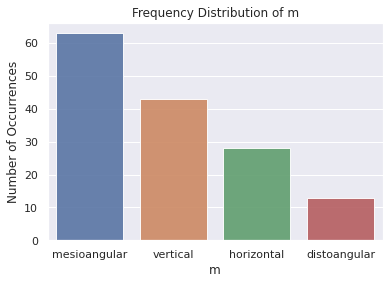

In [ ]:
m_count = df['m'].value_counts()
sns.set(style="darkgrid")
sns.barplot(m_count.index, m_count.values, alpha=0.9)
plt.title('Frequency Distribution of m')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('m', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


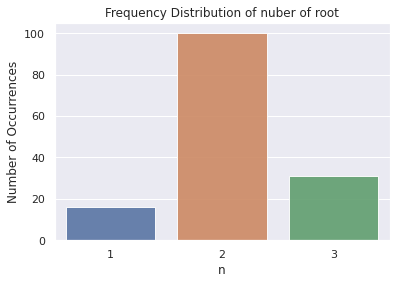

In [ ]:
n_count = df['n'].value_counts()
sns.set(style="darkgrid")
sns.barplot(n_count.index, n_count.values, alpha=0.9)
plt.title('Frequency Distribution of nuber of root')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('n', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


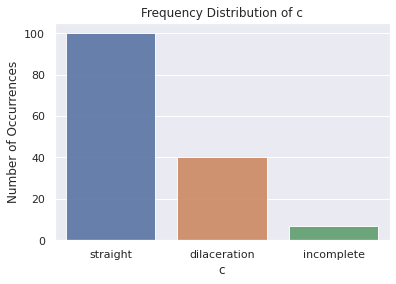

In [ ]:
c_count = df['c'].value_counts()
sns.set(style="darkgrid")
sns.barplot(c_count.index, c_count.values, alpha=0.9)
plt.title('Frequency Distribution of c')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('c', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


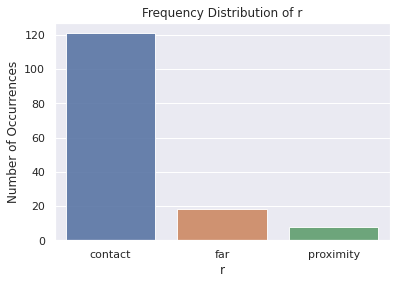

In [ ]:
r_count = df['r'].value_counts()
sns.set(style="darkgrid")
sns.barplot(r_count.index, r_count.values, alpha=0.9)
plt.title('Frequency Distribution of r')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('r', fontsize=12)
plt.show()

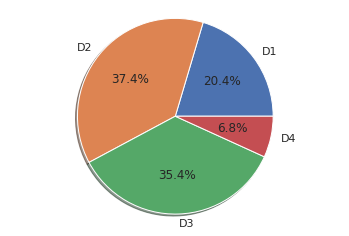

In [ ]:
labels = df['score'].astype('category').cat.categories.tolist()
counts = df['score'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

###Data Preprocessing

In [ ]:
df_obj_cols = df.select_dtypes(include=['object']).columns

In [ ]:
df_obj_cols[:-1]

Index(['m', 'c', 'r'], dtype='object')

In [ ]:
#####################
df_ce = df.copy()

for obj_col in df_obj_cols[:-1]:
  encoder = ce.BinaryEncoder(cols=[obj_col])
  df_ce = encoder.fit_transform(df_ce)

In [ ]:
df_ce = df.copy()

In [ ]:
label_mapper = {
    'mesioangular' : 1,
    'horizontal' : 2,
    'vertical' : 3,
    'distoangular': 4
}
df_ce['m'] = df_ce.m.apply(lambda x: label_mapper[x])

In [ ]:
label_mapper = {
    'incomplete' : 1,
    'straight' : 2,
    'dilaceration' : 3,
}
df_ce[ 'c' ] = df_ce.c.apply(lambda x: label_mapper[x])

In [ ]:
label_mapper = {
    'far' : 1,
    'proximity' : 2,
    'contact' : 3,
    'inside': 4
}
df_ce['r'] = df_ce.r.apply(lambda x: label_mapper[x])

In [ ]:
label_mapper = {
    'D1' : 1,
    'D2' : 2,
    'D3' : 3,
    'D4': 4
}
df_ce['score'] = df_ce.score.apply(lambda x: label_mapper[x])

In [ ]:
df_ce

,m,n,c,r,score
0,1,2,3,3,2
1,3,2,3,3,3
2,2,2,3,3,3
3,1,2,2,1,1
4,4,3,2,3,4
...,...,...,...,...,...
141,1,2,2,3,2
142,4,2,3,3,4
143,2,1,2,3,2
144,1,2,2,3,2


In [ ]:
df_ce.iloc[: , -1]

In [ ]:
X = df_ce.iloc[:, :-1].values
y = df_ce.iloc[: , -1]
n_inputs = X.shape[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print ("X_train.shape" , X_train.shape)
print ("X_test.shape" , X_test.shape)

X_train.shape (102, 4)
X_test.shape (44, 4)


In [ ]:
#sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [ ]:
X_train
X_test
y_train
y_test

In [ ]:
trainX_scaled
testX_scaled
y_train
y_test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

###MLP Model :

In [ ]:
mlp_clf = MLPClassifier(
    activation= 'tanh', 
    hidden_layer_sizes = (150 ,100 ,50), 
    learning_rate= 'constant',  
    solver = 'adam',
    max_iter=1000,
    
     )
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_train)
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, y_pred)))

y2_pred = mlp_clf.predict(X_test)
print('AccuracyTest: {:.2f}'.format(accuracy_score(y_test, y2_pred)))

Accuracy: 0.95
AccuracyTest: 0.95


In [ ]:
y_pred = mlp_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.95


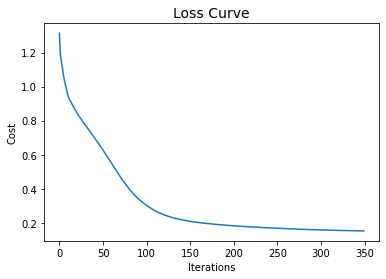

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


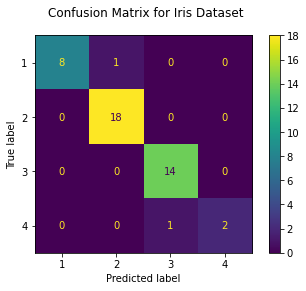

In [ ]:
fig = plot_confusion_matrix(mlp_clf, X_test, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.95      1.00      0.97        18
           3       0.93      1.00      0.97        14
           4       1.00      0.67      0.80         3

    accuracy                           0.95        44
   macro avg       0.97      0.89      0.92        44
weighted avg       0.96      0.95      0.95        44



In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (200,100,50), (100,50)],
    
    'activation': ['tanh', 'relu' ],
    'solver': ['sgd', 'adam','lbfgs'],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [1000, 500 , 800]
}



In [ ]:
grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_) 

{'activation': 'tanh', 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'lbfgs'}


In [ ]:
grid_predictions = grid.predict(X_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))
grid_predictions = grid.predict(X_train) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, grid_predictions)))

Accuracy: 0.89
Accuracy: 0.95


In [ ]:
mlp_clf.n_features_in_

4

In [ ]:
mlp_clf.n_outputs_

4

In [ ]:
mlp_clf.t_

35700

In [ ]:
mlp_clf.n_iter_

350

In [ ]:
mlp_clf.out_activation_

'softmax'

In [ ]:
mlp_clf.n_layers_

5

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = mlp_clf

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=5 , return_times=True)
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=-1,
    scoring="accuracy",
)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

ValueError: ignored

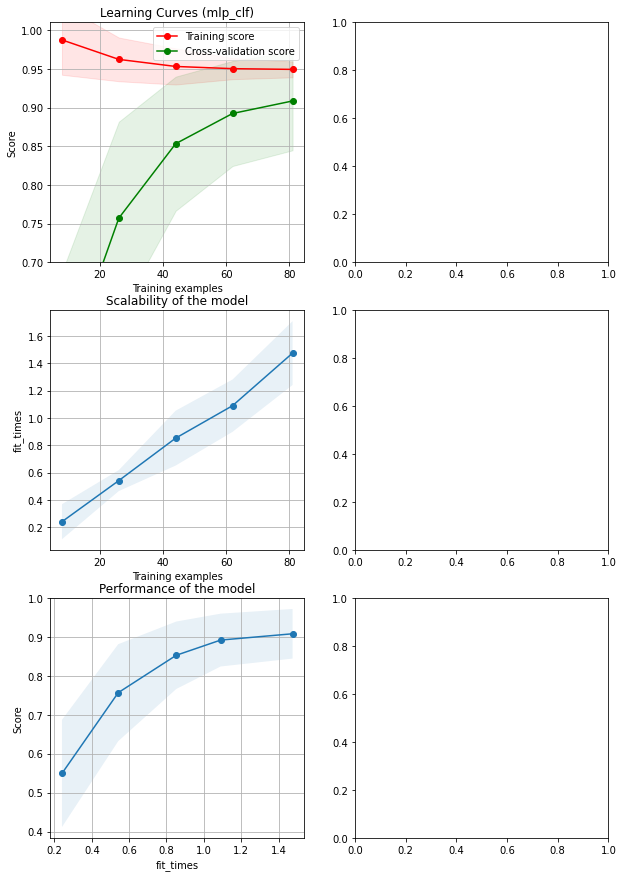

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X = X
y= y

title = "Learning Curves (mlp_clf)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = mlp_clf
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=-1,
    scoring="accuracy",
)

plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.9333333333333333

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9442901234567902, 0.9333333333333333, 0.9357596010227588, None)

In [ ]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

In [ ]:
print (y_test )

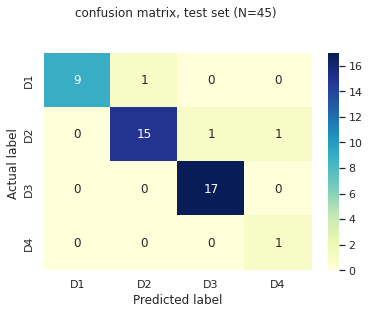

In [ ]:
fx = sns.heatmap(cm, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
fx.set_title('confusion matrix, test set (N=45) \n\n');
fx.set_xlabel('Predicted label')
fx.set_ylabel('Actual label ');

# labels the boxes
labels = df['score'].astype('category').cat.categories.tolist()

fx.xaxis.set_ticklabels(labels)
fx.yaxis.set_ticklabels(labels)

plt.savefig('/content/drive/MyDrive/testcf.svg', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
#
y_predt = mlp_clf.predict(X_train)
print(clf.score(X_train, y_train))

0.9215686274509803


In [ ]:
#
predictionst = clf.predict(X_train)
cmt = confusion_matrix(y_train, predictionst, labels=clf.classes_)

In [ ]:
y_train[0 :21]

In [ ]:
y_train[21 :40]

In [ ]:
y_train[20 :40]

In [ ]:
y_train[40 :60]

In [ ]:
y_train[60 :74]

In [ ]:
y_train[74 :90]

In [ ]:
y_train[90:102]

In [ ]:
print(predictionst)

In [ ]:
predictionst.shape

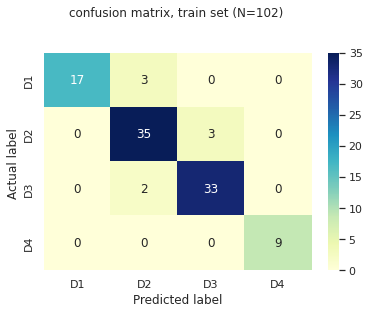

In [ ]:
fx = sns.heatmap(cmt, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
fx.set_title('confusion matrix, train set (N=102) \n\n');
fx.set_xlabel('Predicted label')
fx.set_ylabel('Actual label ');

# labels the boxes
fx.xaxis.set_ticklabels(labels)
fx.yaxis.set_ticklabels(labels)
plt.savefig('/content/drive/MyDrive/traincf.svg', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
print("training")
print("------------------------------------------------------- ")

print(classification_report(y_train, predictionst, target_names=labels))
print("testing")
print("------------------------------------------------------- ")
print(classification_report(y_test, predictions, target_names=labels))



training
------------------------------------------------------- 
              precision    recall  f1-score   support

          D1       1.00      0.85      0.92        20
          D2       0.88      0.92      0.90        38
          D3       0.92      0.94      0.93        35
          D4       1.00      1.00      1.00         9

    accuracy                           0.92       102
   macro avg       0.95      0.93      0.94       102
weighted avg       0.92      0.92      0.92       102

testing
------------------------------------------------------- 
              precision    recall  f1-score   support

          D1       1.00      0.90      0.95        10
          D2       0.94      0.88      0.91        17
          D3       0.94      1.00      0.97        17
          D4       0.50      1.00      0.67         1

    accuracy                           0.93        45
   macro avg       0.85      0.95      0.87        45
weighted avg       0.94      0.93      0.94        45


# New Section

###ANN Model :

In [ ]:
X_train.shape

(102, 4)

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(150,100,50), random_state=0, max_iter=300 ,
                    activation='tanh',solver='adam'  ).fit(X_train, y_train)
pred_y_t= ann.predict(X_train)
#print(ann.accuracy_score(y_train, pred_y_t))
print('Accuracy train : {:.2f}'.format(ann.score(X_train, y_train)))
y_pred = ann.predict(X_test)
#print(ann.accuracy_score(y_test, y_pred))
print('test Accuracy: {:.2f}'.format(ann.score(X_test, y_test)))

Accuracy train : 0.95
test Accuracy: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(150,150,50), random_state=1, max_iter=500 , activation='relu',
                      
                      ).fit(X_train, y_train)
print("train")
pred_y_t= ann.predict(X_train)
#print(ann.score(X_train, y_train))
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, pred_y_t)))
print("test")
y_pred = ann.predict(X_test)
#print(ann.score(X_test, y_test))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

train
Accuracy: 0.95
test
Accuracy: 0.91


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(180,100,50), (150,100 ,50), (100,100,50)],
    'max_iter': [200, 300, 400 ,500],
    'activation': ['tanh' , 'relu'],
    'solver': ['adam' , 'sgd'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(ann, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_) 

grid_predictions = grid.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))


{'activation': 'tanh', 'hidden_layer_sizes': (180, 100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
Accuracy: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


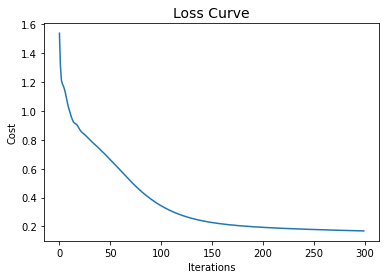

In [ ]:
plt.plot(ann.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

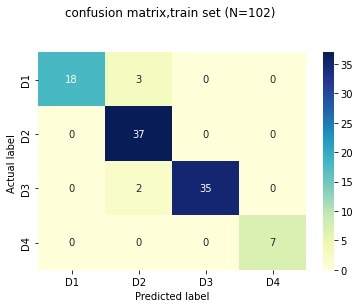

In [ ]:
cm = confusion_matrix(y_train, pred_y_t, labels=ann.classes_)
fx = sns.heatmap(cm, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
fx.set_title('confusion matrix,train set (N=102) \n\n');
fx.set_xlabel('Predicted label')
fx.set_ylabel('Actual label ');

# labels the boxes
labels = df['score'].astype('category').cat.categories.tolist()

fx.xaxis.set_ticklabels(labels)
fx.yaxis.set_ticklabels(labels)

plt.savefig('/content/drive/MyDrive/train102mlp95.svg', dpi=300, bbox_inches='tight')


plt.show()

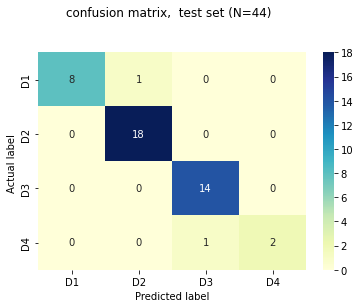

In [ ]:
predictions = ann.predict(X_test)
#y_pred = ann.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=ann.classes_)
fx = sns.heatmap(cm, annot=True, cmap='YlGnBu')

# labels the title and x, y axis of plot
fx.set_title('confusion matrix,  test set (N=44)  \n\n');
fx.set_xlabel('Predicted label')
fx.set_ylabel('Actual label ');

# labels the boxes
labels = df['score'].astype('category').cat.categories.tolist()

fx.xaxis.set_ticklabels(labels)
fx.yaxis.set_ticklabels(labels)

plt.savefig('/content/drive/MyDrive/testmlp95.svg', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
print("training")
print("------------------------------------------------------- ")

print(classification_report(y_train, pred_y_t, target_names=labels))
print("testing")
print("------------------------------------------------------- ")
print(classification_report(y_test, predictions, target_names=labels))


training
------------------------------------------------------- 
              precision    recall  f1-score   support

          D1       1.00      0.86      0.92        21
          D2       0.88      1.00      0.94        37
          D3       1.00      0.95      0.97        37
          D4       1.00      1.00      1.00         7

    accuracy                           0.95       102
   macro avg       0.97      0.95      0.96       102
weighted avg       0.96      0.95      0.95       102

testing
------------------------------------------------------- 
              precision    recall  f1-score   support

          D1       1.00      0.89      0.94         9
          D2       0.95      1.00      0.97        18
          D3       0.93      1.00      0.97        14
          D4       1.00      0.67      0.80         3

    accuracy                           0.95        44
   macro avg       0.97      0.89      0.92        44
weighted avg       0.96      0.95      0.95        44


In [ ]:
print(classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

          D1       1.00      1.00      1.00        10
          D2       1.00      0.88      0.94        17
          D3       0.94      1.00      0.97        17
          D4       0.50      1.00      0.67         1

    accuracy                           0.96        45
   macro avg       0.86      0.97      0.89        45
weighted avg       0.97      0.96      0.96        45



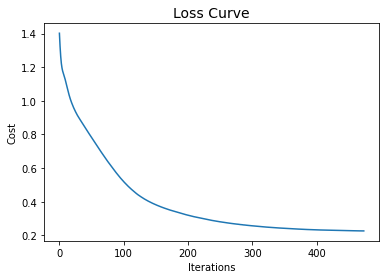

In [ ]:
plt.plot(ann.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
y_train[84 : 102]

63     2
7      2
86     3
96     2
68     3
50     2
101    3
20     3
25     3
134    3
71     2
129    3
79     4
133    3
137    1
72     2
140    3
37     1
Name: score, dtype: int64

array([4, 2, 1, 2, 3, 2, 3, 2, 3, 3, 3, 1, 4, 3, 1, 2, 3, 2, 2, 2, 2, 4,
       2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 4, 2, 3, 3, 2, 2, 1, 3, 2, 1, 2, 3,
       1, 1, 4, 1, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 4, 1,
       2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 2, 3, 4, 2, 1, 2, 3, 1])

In [ ]:
y_test[22:44]

31     4
122    3
48     3
19     3
141    2
116    2
92     1
78     3
124    3
51     2
42     2
108    1
28     1
40     2
104    3
45     3
17     1
69     3
77     2
54     2
110    2
18     2
Name: score, dtype: int64

In [ ]:
predictions

array([1, 2, 1, 2, 2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 4, 2, 1, 3, 3, 3, 3,
       4, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 2, 1, 2, 3, 3, 1, 3, 2, 2, 2, 2])